# HW4

# Cross Validation and Regularization

As discussed in class, in real life regression problems, we do not have the model $f:{\mathbb{R}}^p \rightarrow {\mathbb{R}}$ that generates the output variable, $\vec y_{train}$ from the input data, $\overleftrightarrow x_{train}$, or $\vec y_{train} = f(\overleftrightarrow x_{train})$. Instead, we just have $(\overleftrightarrow x_{train},\vec y_{train})$, and we want to approximate $f$ with some $\hat f:{\mathbb{R}}^p \rightarrow {\mathbb{R}}$. Critically, we seek an $\hat f$ that would "work well" on some unseen data $\overleftrightarrow x_{test}$ that has some unknown output associated with it, $\vec y_{test}$ (**not** on $(\overleftrightarrow x_{train},\vec y_{train})$). By "work well", we mean that we seek an $\hat f$ such that $\hat f(\overleftrightarrow x_{test})$ is as close as possible to $\vec y_{test}$. Mathematically, we seek $\hat f = argmin_g( {\mathbb{E}}[(\vec y_{test} - g(\overleftrightarrow x_{test}))^2])$.

How can we hope to obtain such an $\hat f$ when all we have is $(\overleftrightarrow x_{train},\vec y_{train})$? We assume that $(\overleftrightarrow x_{test},\vec y_{test})$ is sampled from the same distribution as $(\overleftrightarrow x_{train},\vec y_{train})$. So, we can use a subsample of $(\overleftrightarrow x_{train},\vec y_{train})$ as a hold-out set, or validation set—let's name it $(\overleftrightarrow x_{hold},\vec y_{hold})$. We then use training set outside the hold-out set, $(\overleftrightarrow x_{train},\vec y_{train})\setminus (\overleftrightarrow x_{hold},\vec y_{hold})$, to find $\hat f$, and, if $\hat f$ that "works well" on the validation set $(\overleftrightarrow x_{hold},\vec y_{hold})$ (in the above sense), we have reason to think that it would work well also on $(\overleftrightarrow x_{test},\vec y_{test})$.

As we discussed in class, cross validation is the current gold standard to find such an $\hat f$, and especially to prevent overfitting, which is common with the modern, powerful machine-learning models. Cross validation is also often used to select the best free hyper-parameters of a model. Once those best hyper-parameters are found, we would train the model on the entire training set, $(\overleftrightarrow x_{train},\vec y_{train})$ with those hyper-parameters. And that $\hat f$ that was trained on the entire training set would be the one we would use on the test set, $(\overleftrightarrow x_{test},\vec y_{test})$.





In [ ]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_regression
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Q1. (1 point) Split it the following dataset into a training set and testing set.

In [ ]:
X, y, true_b = make_regression(n_samples=200, n_features=50, 
                                     n_informative=5, n_targets=1, 
                                     bias=0.0, effective_rank=None, 
                                     tail_strength=0.5, noise=5.0, 
                                     shuffle=True, coef=True, random_state=42)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.33, random_state=42)

Q2. (1 points) The KFold function in Scikit-learn allows you to perform K-fold validation easily. Check the documentation here (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Complete the following code block for cross-validation to estimate the model's accuracy on the test set ($R^2$ on the test set) of linear regression.

In [ ]:
# KFold object for 5-fold validation
kf = ms.KFold(5,shuffle=True)

In [ ]:
r2s = []
linear = lm.LinearRegression()
for train, validate in kf.split(X_train):
    # for each iteration, train is the indices of the k-1 chunks
    # validate is the indices of the kth (remaining) chunk
    # train the model using k-1 chunks and predict on the validation set
    kf_X_train = X_train[train]
    kf_y_train = y_train[train]
    kf_X_test = X_train[validate]
    kf_y_test = y_train[validate]
    linear.fit(kf_X_train,kf_y_train)
    # test the model on the remaining chunk
    score = linear.score(kf_X_test,kf_y_test)   
    r2s.append(score)

In [ ]:
print(r2s)
print("Average R2: {}".format(np.array(r2s).mean()))

[0.9939613283081344, 0.9851126163964816, 0.98562202924147, 0.9756845008495992, 0.9915585319351808]
Average R2: 0.9863878013461733


# Optimizing Ridge Regression
Q3.a (1 point) You are provided with a range of $\alpha$'s, the regularization coefficient or shrinkage penalty in ridge regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Use cross-validation to select the best $\alpha$.

In [ ]:
# range of alphas to be tested
alphas = np.logspace(-3, 3, 20)  # 20 potential values between .001 and 1000

In [ ]:
# use k-fold validation on each value of alpha to determine the mean R^2.
ridge_scores = []

for alpha in alphas:
    ridge = lm.Ridge(alpha=alpha)
    alpha_score = ms.cross_val_score(ridge , X_train, y_train, cv=kf).mean()
    ridge_scores.append([alpha,alpha_score])
ridge_scores = np.vstack(ridge_scores)

In [ ]:
print(ridge_scores)  # for "sanity checking"

[[1.00000000e-03 9.87902909e-01]
 [2.06913808e-03 9.84928439e-01]
 [4.28133240e-03 9.86294017e-01]
 [8.85866790e-03 9.85377565e-01]
 [1.83298071e-02 9.85650503e-01]
 [3.79269019e-02 9.86792750e-01]
 [7.84759970e-02 9.88815919e-01]
 [1.62377674e-01 9.86609136e-01]
 [3.35981829e-01 9.86504350e-01]
 [6.95192796e-01 9.85085309e-01]
 [1.43844989e+00 9.87621822e-01]
 [2.97635144e+00 9.82836348e-01]
 [6.15848211e+00 9.68540175e-01]
 [1.27427499e+01 9.40839627e-01]
 [2.63665090e+01 8.92877027e-01]
 [5.45559478e+01 7.47739218e-01]
 [1.12883789e+02 5.84153162e-01]
 [2.33572147e+02 4.02988320e-01]
 [4.83293024e+02 1.90953583e-01]
 [1.00000000e+03 1.40167434e-01]]


In [ ]:
ridge_bestalpha = ridge_scores[np.argmax(ridge_scores[:,1])][0]
ridge_bestalpha

0.07847599703514611

Q3.b (1 point) plot the mean score against alpha candidates.

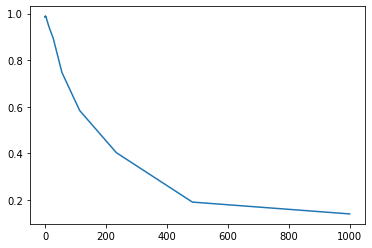

In [ ]:
plt.plot(ridge_scores[:,0],ridge_scores[:,1])

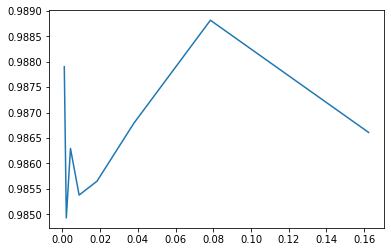

In [ ]:
plt.plot(ridge_scores[:8,0],ridge_scores[:8,1]) #Zoomed up on first 8 alphas

Q3.c (1 point) With the best alpha, train the full model on the training data and predict on the testing data.



In [ ]:
ridge = lm.Ridge(alpha=ridge_bestalpha)
ridge.fit(X_train,y_train)
best_ridge_score = ms.cross_val_score(ridge , X_test, y_test, cv=kf).mean()
best_ridge_score

0.8671543270449293

## LASSO
Q4.a (1 points) Optimize the $\alpha$ parameter in LASSO (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) using the procedure above.

In [ ]:
# use k-fold validation on each value of alpha to determine the mean R^2.
lasso_scores = []
for alpha in alphas:
    lasso = lm.Lasso(alpha=alpha)
    alpha_score = ms.cross_val_score(lasso , X_train, y_train, cv=kf).mean()
    lasso_scores.append([alpha,alpha_score])
lasso_scores = np.vstack(lasso_scores)

In [ ]:
lasso_bestalpha = lasso_scores[np.argmax(lasso_scores[:,1])][0]
lasso_bestalpha

0.6951927961775606

Q4.b (1 point) plot the mean score against alpha candidates.

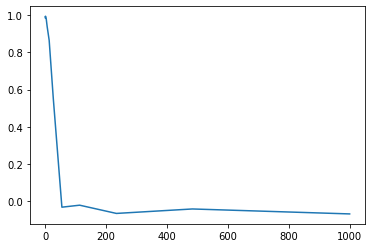

In [ ]:
plt.plot(lasso_scores[:,0],lasso_scores[:,1])

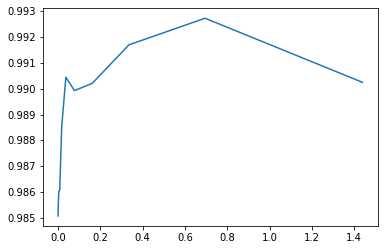

In [ ]:
plt.plot(lasso_scores[:11,0],lasso_scores[:11,1]) #Zoomed up on first 11 alphas

Q4.c (1 point) With the best alpha, train the full model on the training data and predict on the testing data.


In [ ]:
lasso = lm.Lasso(alpha=lasso_bestalpha)
lasso.fit(X_train,y_train)
best_lasso_score = ms.cross_val_score(lasso , X_test, y_test, cv=kf).mean()
best_lasso_score

0.9927071405156749

Scikit learn includes functions that take care of the entire cross validation process (so you do not have to write the loop). However, they require scikit-learn specific models with .fit() and .predict/score() methods, while the loop procedure above will work with any model (for example, when applying it to deep learning models). http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

Additionally, Ridge and LASSO include the RidgeCV() and LassoCV() classes, which might be of use later.

Q5. (2 points) Select the best $\alpha$ parameters for Ridge and Lasso using the RidgeCV() and LassoCV() functions from scikit-learn.

In [ ]:
ridge_cv = lm.RidgeCV(alphas=alphas,cv=kf)
ridge_cv.fit(X_train,y_train)
print("Optimal Ridge Alpha: ", ridge_cv.alpha_)

Optimal Ridge Alpha:  0.6951927961775606


In [ ]:
lasso_cv = lm.LassoCV(cv=kf)
lasso_cv.fit(X_train,y_train)
print("Optimal Lasso Alpha: ", lasso_cv.alpha_)

Optimal Lasso Alpha:  0.6341585659921204
